# Working with Metrica Data - setting the stage for Project 1

In [1]:
%load_ext autoreload
%autoreload 2

import pandas as pd
pd.set_option("display.max_rows", 101)
pd.set_option("display.max_columns", 101)
pd.options.mode.chained_assignment = None

import matplotlib.pyplot as plt
import os
import numpy as np
import math 

In [2]:
# Import some classes that I shamelessly borrowed from https://github.com/Friends-of-Tracking-Data-FoTD/LaurieOnTracking
import Metrica_IO as mio
import Metrica_Viz as mviz

In [3]:
# Import our own module
import module1 as mp

In [4]:
# set up initial path to data
DATADIR = os.path.join("sample-data","data")
game_id = 2 # let's look at sample match 2


## Event Data

In [5]:
# read in the event data
events = mio.read_event_data(DATADIR,game_id)

In [6]:
# count the number of each event type in the data
print( events['Type'].value_counts() )

PASS              964
CHALLENGE         311
RECOVERY          248
BALL LOST         233
SET PIECE          80
BALL OUT           49
SHOT               24
FAULT RECEIVED     20
CARD                6
Name: Type, dtype: int64


In [7]:
# Bit of housekeeping: unit conversion from metric data units to meters
events = mio.to_metric_coordinates(events)

In [8]:
events

,Team,Type,Subtype,Period,Start Frame,Start Time [s],End Frame,End Time [s],From,To,Start X,Start Y,End X,End Y
0,Away,SET PIECE,KICK OFF,1,51,2.04,51,2.04,Player23,NaN,NaN,NaN,NaN,NaN
1,Away,PASS,NaN,1,51,2.04,87,3.48,Player23,Player20,0.00,-0.00,-10.60,-0.68
2,Away,PASS,NaN,1,146,5.84,186,7.44,Player20,Player18,-7.42,-0.00,-6.36,19.04
3,Away,PASS,NaN,1,248,9.92,283,11.32,Player18,Player17,-3.18,21.08,-20.14,14.96
4,Away,PASS,NaN,1,316,12.64,346,13.84,Player17,Player16,-22.26,12.24,-25.44,-5.44
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1930,Away,BALL LOST,INTERCEPTION,2,140122,5604.88,140183,5607.32,Player21,NaN,4.24,-18.36,-22.26,17.68
1931,Home,CHALLENGE,AERIAL-LOST,2,140180,5607.20,140180,5607.20,Player1,NaN,-20.14,13.60,NaN,NaN
1932,Away,CHALLENGE,AERIAL-LOST,2,140183,5607.32,140183,5607.32,Player24,NaN,-19.08,13.60,NaN,NaN
1933,Home,RECOVERY,NaN,2,140211,5608.44,140211,5608.44,Player12,NaN,-16.96,12.24,NaN,NaN


In [9]:
# Get events by team
home_events = events[events['Team']=='Home']
away_events = events[events['Team']=='Away']

# Frequency of each event type by team
home_events['Type'].value_counts()
away_events['Type'].value_counts()

PASS              421
CHALLENGE         151
BALL LOST         113
RECOVERY          113
SET PIECE          46
BALL OUT           22
FAULT RECEIVED     11
SHOT               11
CARD                3
Name: Type, dtype: int64

In [10]:
home_events

,Team,Type,Subtype,Period,Start Frame,Start Time [s],End Frame,End Time [s],From,To,Start X,Start Y,End X,End Y
8,Home,CHALLENGE,GROUND-WON,1,504,20.16,504,20.16,Player3,NaN,12.72,-28.56,NaN,NaN
9,Home,RECOVERY,INTERCEPTION,1,504,20.16,504,20.16,Player3,NaN,12.72,-28.56,NaN,NaN
10,Home,BALL OUT,NaN,1,504,20.16,534,21.36,Player3,NaN,12.72,-28.56,4.24,-34.68
18,Home,CHALLENGE,AERIAL-WON,1,1084,43.36,1084,43.36,Player6,NaN,1.06,-17.00,NaN,NaN
19,Home,RECOVERY,INTERCEPTION,1,1084,43.36,1084,43.36,Player6,NaN,1.06,-17.00,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1926,Home,SET PIECE,FREE KICK,2,139891,5595.64,139891,5595.64,Player9,NaN,NaN,NaN,NaN,NaN
1927,Home,SHOT,ON TARGET-SAVED,2,139891,5595.64,139925,5597.00,Player9,NaN,21.20,-1.36,50.88,-1.36
1931,Home,CHALLENGE,AERIAL-LOST,2,140180,5607.20,140180,5607.20,Player1,NaN,-20.14,13.60,NaN,NaN
1933,Home,RECOVERY,NaN,2,140211,5608.44,140211,5608.44,Player12,NaN,-16.96,12.24,NaN,NaN


## Tracking Data

In [11]:
tracking_home = mio.tracking_data(DATADIR,game_id,'Home')
tracking_away = mio.tracking_data(DATADIR,game_id,'Away')

# Convert positions from metrica units to meters 
tracking_home = mio.to_metric_coordinates(tracking_home)
tracking_away = mio.to_metric_coordinates(tracking_away)

# # plot player positions at ,atckick-off
# KO_Frame = events.loc[0]['Start Frame']
# fig,ax = mviz.plot_frame( tracking_home.loc[KO_Frame], tracking_away.loc[KO_Frame] )


Reading team: home
Reading team: away


In [12]:
# Merge both tracking data into one df
tracking = pd.merge(tracking_home,tracking_away, how="left")
tracking



,Period,Time [s],Player11_x,Player11_y,Player1_x,Player1_y,Player2_x,Player2_y,Player3_x,Player3_y,Player4_x,Player4_y,Player5_x,Player5_y,Player6_x,Player6_y,Player7_x,Player7_y,Player8_x,Player8_y,Player9_x,Player9_y,Player10_x,Player10_y,Player12_x,Player12_y,Player13_x,Player13_y,Player14_x,Player14_y,ball_x,ball_y,Player25_x,Player25_y,Player15_x,Player15_y,Player16_x,Player16_y,Player17_x,Player17_y,Player18_x,Player18_y,Player19_x,Player19_y,Player20_x,Player20_y,Player21_x,Player21_y,Player22_x,Player22_y,Player23_x,Player23_y,Player24_x,Player24_y,Player26_x,Player26_y
0,1,0.04,46.9315,-0.28084,15.70072,14.54860,18.81712,4.89396,21.07492,-3.81208,15.20888,-17.85204,-28.26066,16.40908,10.88514,1.77004,9.01848,-2.05156,3.35278,-17.05712,0.67522,13.50684,0.20564,-7.56364,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-51.70892,-1.19884,-18.13554,-21.65528,-20.42196,-3.52376,-18.83090,7.51128,-14.30470,12.88668,-0.46216,-28.12752,-10.79928,1.89176,-7.08822,12.67928,-0.11766,35.53884,0.18762,-0.0986,-0.51198,9.36088,NaN,NaN
1,1,0.08,46.9315,-0.28084,15.70072,14.54860,18.81712,4.89396,21.07492,-3.81208,15.20888,-17.85204,-28.26066,16.40908,10.88514,1.77004,9.01848,-2.05156,3.35278,-17.05712,0.67522,13.50684,0.20564,-7.56364,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-51.70892,-1.19884,-18.13554,-21.65528,-20.42196,-3.52376,-18.83090,7.51128,-14.30470,12.88668,-0.46216,-28.12752,-10.79928,1.89176,-7.08822,12.67928,-0.11766,35.53884,0.18762,-0.0986,-0.51198,9.36088,NaN,NaN
2,1,0.12,46.9315,-0.28084,15.70072,14.54860,18.81712,4.89396,21.07492,-3.81208,15.20888,-17.85204,-28.26066,16.40908,10.88514,1.77004,9.01848,-2.05156,3.35278,-17.05712,0.67522,13.50684,0.20564,-7.56364,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-51.70892,-1.19884,-18.13554,-21.65528,-20.42196,-3.52376,-18.83090,7.51128,-14.30470,12.88668,-0.46216,-28.12752,-10.79928,1.89176,-7.08822,12.67928,-0.11766,35.53884,0.18762,-0.0986,-0.51198,9.36088,NaN,NaN
3,1,0.16,46.9315,-0.28084,15.70072,14.54860,18.81712,4.89396,21.07492,-3.81208,15.20888,-17.85204,-28.35076,16.40840,10.88514,1.77004,9.01848,-2.05156,3.35278,-17.05712,0.67522,13.50684,0.20564,-7.56364,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-51.70892,-1.19884,-18.19384,-21.65596,-20.42196,-3.52376,-18.83090,7.51128,-14.30470,12.88668,-0.46216,-28.12752,-10.79928,1.89176,-7.08822,12.67928,-0.11766,35.53884,0.18762,-0.0986,-0.51198,9.36088,NaN,NaN
4,1,0.20,46.9315,-0.28084,15.70072,14.54860,18.81712,4.89396,21.07492,-3.81208,15.20888,-17.85204,-28.43980,16.40772,10.88514,1.77004,9.01848,-2.05156,3.35278,-17.05712,0.67522,13.50684,0.20564,-7.56364,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-51.70892,-1.19884,-18.25002,-21.65596,-20.42196,-3.52376,-18.83090,7.51128,-14.30470,12.88668,-0.46216,-28.12752,-10.79928,1.89176,-7.08822,12.67928,-0.11766,35.53884,0.18762,-0.0986,-0.51198,9.36088,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
141151,2,5646.08,-46.3379,-0.84524,-12.19106,23.55792,-29.08852,5.87860,-24.22948,12.09788,NaN,NaN,-9.97248,28.55864,-11.75010,-4.36084,-14.61104,-4.22824,NaN,NaN,-22.86844,9.62540,NaN,NaN,-9.71278,24.17468,1.09392,-30.29672,-23.36028,9.04400,NaN,NaN,43.68366,1.14852,-1.03032,37.40000,-1.15434,3.54416,10.37528,-5.07824,-7.39138,-7.52964,-10.17388,-2.99676,-25.87036,7.87100,-3.44394,-37.40000,NaN,NaN,-24.53370,-8.0546,-14.03440,25.50272,-5.33604,5.73104
141152,2,5646.12,-46.3379,-0.84524,-12.19106,23.55792,-29.08852,5.87860,-24.22948,12.09788,NaN,NaN,-9.97248,28.55864,-11.69710,-4.34860,-14.61104,-4.22824,NaN,NaN,-22.93310,9.56556,NaN,NaN,-9.71278,24.17468,1.09286,-30.34568,-23.31046,9.03176,NaN,NaN,43.66246,1.14852,-1.03032,37.40000,-1.17236,3.56252,10.35302,-5.10612,-7.39032,-7.52216,-10.17494,-3.02532,-25.87036,7.87100,-3.40260,-37.40000,NaN,NaN,-24.53370,-8.0546,-14.03440,25.50272,-5.31802,5.74600
141153,2,5646.16,-46.3379,-0.84524,-12.19106,23.55792

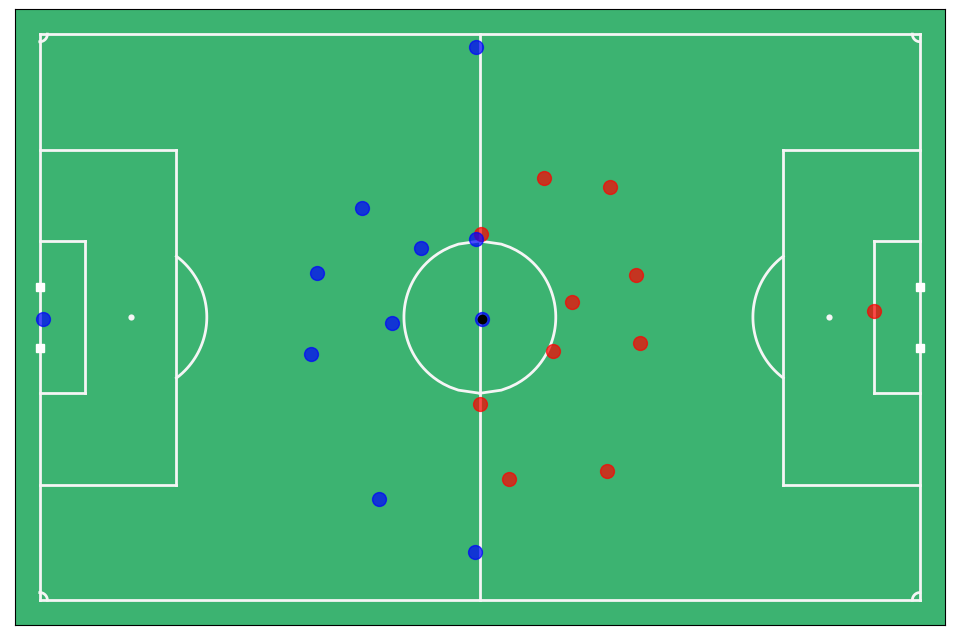

In [13]:
# plot player positions at ckick-off
KO_Frame = events.loc[0]['Start Frame']
fig,ax = mviz.plot_frame( tracking_home.loc[KO_Frame], tracking_away.loc[KO_Frame] )


## Create Passes Dataframe

In [14]:
passes = events.loc[events["Type"]=="PASS"]

In [15]:
passes["Subtype"].unique() #see types of passes

array([nan, 'HEAD', 'CROSS', 'DEEP BALL', 'GOAL KICK',
       'HEAD-INTERCEPTION-CLEARANCE'], dtype=object)

In [16]:
passes

,Team,Type,Subtype,Period,Start Frame,Start Time [s],End Frame,End Time [s],From,To,Start X,Start Y,End X,End Y
1,Away,PASS,NaN,1,51,2.04,87,3.48,Player23,Player20,0.00,-0.00,-10.60,-0.68
2,Away,PASS,NaN,1,146,5.84,186,7.44,Player20,Player18,-7.42,-0.00,-6.36,19.04
3,Away,PASS,NaN,1,248,9.92,283,11.32,Player18,Player17,-3.18,21.08,-20.14,14.96
4,Away,PASS,NaN,1,316,12.64,346,13.84,Player17,Player16,-22.26,12.24,-25.44,-5.44
5,Away,PASS,NaN,1,395,15.80,423,16.92,Player16,Player15,-25.44,-10.88,-24.38,-27.88
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1914,Home,PASS,NaN,2,137209,5488.36,137221,5488.84,Player1,Player6,-9.54,12.24,-4.24,4.76
1915,Home,PASS,NaN,2,137263,5490.52,137303,5492.12,Player6,Player1,-4.24,12.24,-12.72,21.76
1916,Home,PASS,NaN,2,137303,5492.12,137332,5493.28,Player1,Player5,-12.72,21.76,-1.06,26.52
1917,Home,PASS,NaN,2,137334,5493.36,137359,5494.36,Player5,Player1,-1.06,26.52,-15.90,26.52


We're going to exclude head-interruption-clearance pass because there's no information about it. The length is 963 rows now.

In [17]:
passes = passes.loc[passes["Subtype"] != "HEAD-INTERCEPTION-CLEARANCE"]

Also, reduce the tracking dataframe to only what we need for pass!

In [18]:
passes.frames = passes["Start Frame"].tolist()
len(passes.frames)
trackingpasses=tracking.loc[passes.frames,]
trackingpasses

C:\Users\Stephanie Tanasia\AppData\Local\Temp\ipykernel_16936\2811025247.py:1: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  passes.frames = passes["Start Frame"].tolist()


,Period,Time [s],Player11_x,Player11_y,Player1_x,Player1_y,Player2_x,Player2_y,Player3_x,Player3_y,Player4_x,Player4_y,Player5_x,Player5_y,Player6_x,Player6_y,Player7_x,Player7_y,Player8_x,Player8_y,Player9_x,Player9_y,Player10_x,Player10_y,Player12_x,Player12_y,Player13_x,Player13_y,Player14_x,Player14_y,ball_x,ball_y,Player25_x,Player25_y,Player15_x,Player15_y,Player16_x,Player16_y,Player17_x,Player17_y,Player18_x,Player18_y,Player19_x,Player19_y,Player20_x,Player20_y,Player21_x,Player21_y,Player22_x,Player22_y,Player23_x,Player23_y,Player24_x,Player24_y,Player26_x,Player26_y
51,1,2.08,47.46574,0.67660,15.68482,15.63660,18.83090,5.01228,19.18706,-3.12936,15.29368,-18.49396,7.70620,16.76336,11.10350,1.80472,8.85948,-4.02424,3.52238,-19.48268,0.13568,10.02252,0.03816,-10.40196,NaN,NaN,NaN,NaN,NaN,NaN,0.04240,-0.26112,-52.66610,-0.19924,-12.15290,-21.80828,-20.30006,-4.48664,-19.67996,5.33528,-14.14676,13.12332,-0.54060,-28.19144,-10.55230,-0.69428,-7.10306,8.33476,-0.52152,32.47068,0.22684,-0.25228,-0.44520,9.41120,NaN,NaN
146,1,5.88,44.63130,0.55488,17.73804,16.49816,19.51778,6.56608,16.52752,-3.37348,16.86566,-19.85736,8.32630,18.48784,9.32058,5.22240,7.84188,-2.49356,3.80964,-15.81884,-1.15752,5.07892,-6.71722,-0.95132,NaN,NaN,NaN,NaN,NaN,NaN,-7.89700,0.34340,-51.47572,-0.02312,-7.94788,-20.51492,-18.19914,-4.22824,-17.69776,6.63680,-8.98880,16.52264,6.00384,-24.31952,-7.92138,-0.07276,-1.39496,9.68252,8.11960,32.99972,8.39414,-1.64492,6.77552,6.75240,NaN,NaN
248,1,9.96,40.81000,3.33744,15.22478,24.69148,20.12516,15.48156,19.01746,0.98124,19.57714,-11.88640,-0.54696,23.44572,9.31422,18.11112,11.41938,5.56580,8.14080,-8.13280,-1.99704,15.59852,-3.83508,3.71960,NaN,NaN,NaN,NaN,NaN,NaN,-4.12658,21.13644,-46.10258,1.47492,-5.52154,-18.72652,-18.39948,-4.61040,-19.00580,14.05152,-3.72696,21.33364,7.14970,-20.71416,-1.83592,0.54264,0.21730,17.17204,5.93070,33.03916,16.85930,-1.33620,16.24026,17.98124,NaN,NaN
316,1,12.68,38.01584,2.09168,14.42342,21.61720,16.00918,8.43608,15.35304,-2.11208,16.28478,-18.80336,-2.84610,18.71768,4.40112,10.87456,2.69240,0.51136,3.81600,-13.73464,-8.32206,10.23128,-8.96336,-2.35620,NaN,NaN,NaN,NaN,NaN,NaN,-21.91762,12.43040,-43.73772,2.31812,-9.71596,-24.69352,-23.61468,-5.11496,-21.98864,12.38280,-5.96462,27.67872,9.20292,-25.91072,-4.54422,-1.01728,-7.52918,13.76592,7.23132,31.82808,15.16648,-5.02044,13.33162,14.19364,NaN,NaN
395,1,15.84,35.43368,-0.12784,14.64178,16.22548,15.15588,-0.81328,13.71428,-10.65424,7.49420,-25.18720,-2.77190,13.71968,1.84228,0.68544,-8.63476,-8.25928,-10.19932,-21.61244,-13.12810,3.41496,-21.98758,-9.52544,NaN,NaN,NaN,NaN,NaN,NaN,-25.75376,-10.79976,-43.51088,0.45016,-22.07874,-27.16872,-25.77708,-10.90856,-27.25684,8.16476,-11.73526,30.40076,1.40556,-27.07556,-12.53768,-6.81020,-13.16944,6.75852,7.24828,27.30132,11.44482,-11.69124,7.45180,7.41200,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
137209,2,5488.40,-39.91748,0.88604,-9.54424,12.60992,-14.96296,-9.13716,-22.15930,2.85600,NaN,NaN,3.03054,7.18760,-4.04284,2.97500,12.45394,-17.12104,NaN,NaN,16.04840,14.76620,NaN,NaN,9.82620,7.67652,8.88068,-2.67988,-0.69854,-28.90612,-9.24002,12.15160,41.08772,0.84864,9.95552,13.57824,14.93116,8.97124,15.46752,-2.28820,16.52116,-12.54736,9.01424,-15.66448,-0.18338,1.16756,2.36168,7.08900,NaN,NaN,-5.18446,-11.49268,-3.69092,13.09884,-8.46622,2.32696
137263,2,5490.56,-41.50324,1.26072,-12.95108,17.41820,-16.16818,-8.40820,-26.25514,6.17032,NaN,NaN,1.68540,15.33400,-3.88808,12.24340,13.18428,-21.66072,NaN,NaN,12.81222,18.50076,NaN,NaN,9.15946,8.21440,2.95210,-3.17628,-1.87408,-29.64052,-4.10432,12.23524,39.93338,1.12812,7.51540,18.94208,10.77066,10.20612,13.11750,-1.14240,14.12026,-11.55456,5.99536,-14.01888,-4.86328,11.85172,1.19038,12.76428,NaN,NaN,-9.28772,-8.40480,-3.62414,14.23036,-13.26590,7.

Looking at Passes Statistics to Set Threshold of Distance

In [19]:
# The lenght of each pass via distance forula
passes["passlength"]= np.sqrt(np.square(passes["Start X"]-passes["End X"])+np.square(passes["Start Y"]-passes["End Y"]))
passes[["passlength"]].describe()

,passlength
count,963.000000
mean,15.408720
std,9.041609
min,1.060000
25%,9.520000
50%,13.338201
75%,19.405109
max,60.112455


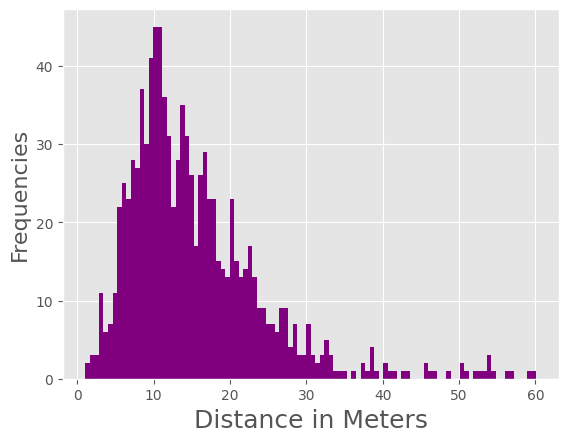

In [20]:
# Plot the distance of the passes
plt.style.use('ggplot')
plt.hist(passes["passlength"], color="purple", bins=100)
fig.suptitle('Histogram of Distance in Passes', fontsize=20)
plt.xlabel('Distance in Meters', fontsize=18)
plt.ylabel('Frequencies', fontsize=16)
fig.savefig('dist.jpg')

## Surrounding Opponents Factor

In [152]:
# Calculate how many opponents around the player using a circle (diameter 10m- round down the median of 13)
df = trackingpasses

startplayers=[]
for value in passes["From"]:
    if len(value)==8:
        startplayers.append(int(value[-2:]))
    else :
        startplayers.append(int(value[-1]))

df["startpasses"] = startplayers
list(df.columns)
df = df[['Period','Time [s]','ball_x','ball_y','startpasses','Player11_x','Player11_y','Player1_x','Player1_y','Player2_x','Player2_y','Player3_x','Player3_y','Player4_x','Player4_y','Player5_x','Player5_y','Player6_x','Player6_y','Player7_x','Player7_y','Player8_x','Player8_y','Player9_x','Player9_y','Player10_x','Player10_y',
 'Player12_x','Player12_y','Player13_x','Player13_y','Player14_x','Player14_y','Player25_x','Player25_y','Player15_x','Player15_y','Player16_x','Player16_y','Player17_x','Player17_y','Player18_x','Player18_y',
 'Player19_x','Player19_y','Player20_x','Player20_y','Player21_x','Player21_y','Player22_x','Player22_y','Player23_x','Player23_y','Player24_x','Player24_y','Player26_x','Player26_y']]
df

#Merge the coordinates
mp.mergexy(df)
df = df.drop(df.columns[range(5,57)], axis=1)


In [154]:
# Count opponents that is surrounding the player with the ball (radius 5m)
count=[]
home = list(range(1,15))
away = list(range(15,27))
for i in range(0,963):
    s = df["startpasses"].iloc[i]
    d = []
    if s < 15:
        for j in away:
            d.append(mp.dist(df["Player"+str(s)].iloc[i], df["Player"+str(j)].iloc[i] ))
    else:
        for j in home:
            d.append(mp.dist(df["Player"+str(s)].iloc[i], df["Player"+str(j)].iloc[i] ))
    count.append( sum(k < 10 for k in d))

In [158]:
#Assign values based on the number of surrounding opponents
n_opp=[]
for i in range(0,963):
    if count[i] == 0 :
        n_opp.append(0)
    elif count[i] < 3:
        n_opp.append(1)
    else:
        n_opp.append(2)
        
df["n_opp"] = n_opp

## Distance Factor

In [159]:
# Making the column for length, we consider passes longer than 10m as long pass                                                                                             
length =[]
for value in passes["passlength"]:
    if value <= 10:
        length.append(0)
    else: 
        length.append(1)
length

df["passlength"] = length

## Field Position Factor

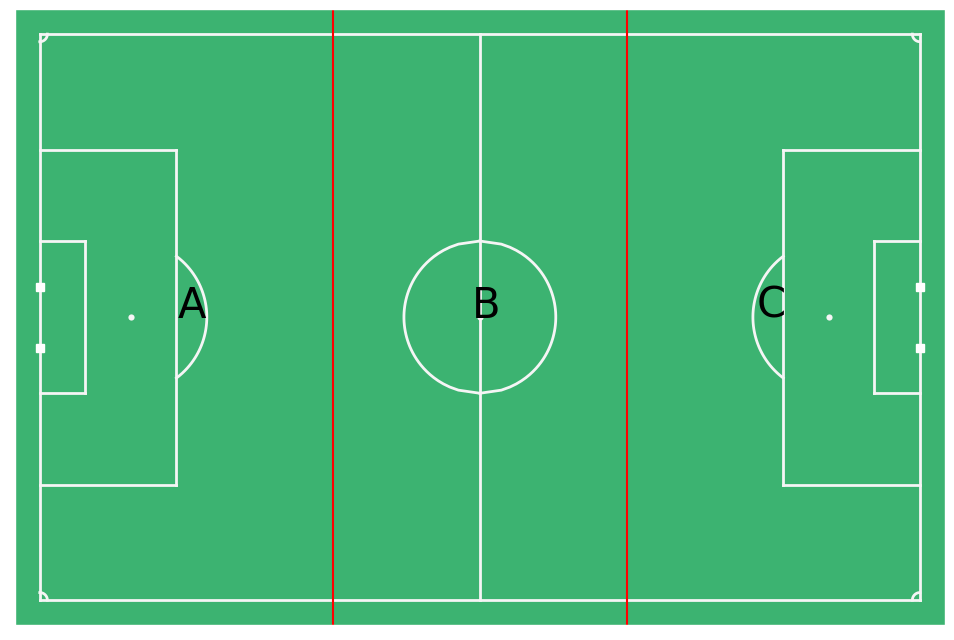

In [160]:
#The difficulty of a pass based on the field position (divided into 3)
#Assumption: if passing through the sections, then see start point
fig, ax= mviz.plot_pitch()
ax.annotate("A", xy = (-109/3,0), fontsize=30)
ax.annotate("C", xy = (100/3,0), fontsize=30)
ax.annotate("B", xy = (-1,0), fontsize=30)
plt.axvline(x=(53-106/3), color="red")
plt.axvline(x=(-53+106/3), color="red")

In [161]:
# Track the passes start location and assign values for it. 
posvalue =[]
for value in passes["Start X"]:
    if value <= -53+106/3 or value >= 53-106/3: #if start in A or C
        posvalue.append(1)
    else: 
        posvalue.append(0)
posvalue

df["posvalue"] = posvalue

## Type of Pass Factor

In [162]:
#Change NaN into REG in subtype passes
passes.Subtype = passes.Subtype.fillna('REG')
passes["Subtype"].unique()

array(['REG', 'HEAD', 'CROSS', 'DEEP BALL', 'GOAL KICK'], dtype=object)

In [163]:
#Type of pass factor passtypes 'REG', 'HEAD', 'CROSS', 'DEEP BALL', 'GOAL KICK',
df["type"]=mp.types(passes["Subtype"])
df

,Period,Time [s],ball_x,ball_y,startpasses,Player1,Player2,Player3,Player4,Player5,Player6,Player7,Player8,Player9,Player10,Player11,Player12,Player13,Player14,Player15,Player16,Player17,Player18,Player19,Player20,Player21,Player22,Player23,Player24,Player25,Player26,n_opp,passlength,posvalue,type
51,1,2.08,0.04240,-0.26112,23,"(15.684819999999993, 15.6366)","(18.830899999999996, 5.012280000000004)","(19.18706, -3.1293599999999966)","(15.293679999999997, -18.493959999999994)","(7.706199999999999, 16.76336)","(11.1035, 1.8047199999999968)","(8.859479999999998, -4.024240000000001)","(3.5223799999999983, -19.482680000000002)","(0.13568000000000624, 10.022520000000002)","(0.03816000000000286, -10.401959999999995)","(47.46573999999999, 0.676600000000001)","(nan, nan)","(nan, nan)","(nan, nan)","(-12.152899999999997, -21.808280000000003)","(-20.300060000000002, -4.486640000000003)","(-19.679959999999998, 5.335280000000002)","(-14.146759999999997, 13.12332)","(-0.5405999999999993, -28.191439999999997)","(-10.552300000000002, -0.6942800000000036)","(-7.103060000000001, 8.334759999999998)","(-0.5215199999999979, 32.47068)","(0.2268399999999915, -0.2522799999999994)","(-0.44519999999999804, 9.411200000000001)","(-52.6661, -0.1992399999999992)","(nan, nan)",1,1,0,1
146,1,5.88,-7.89700,0.34340,20,"(17.738039999999994, 16.49816)","(19.517780000000002, 6.566079999999999)","(16.527519999999996, -3.373480000000003)","(16.86566000000001, -19.857359999999996)","(8.326300000000002, 18.487840000000002)","(9.320580000000007, 5.222399999999999)","(7.841880000000005, -2.4935599999999987)","(3.8096399999999973, -15.81884)","(-1.1575199999999986, 5.078919999999998)","(-6.717219999999998, -0.9513199999999964)","(44.6313, 0.5548800000000038)","(nan, nan)","(nan, nan)","(nan, nan)","(-7.947879999999999, -20.51492)","(-18.19914, -4.228240000000001)","(-17.69776, 6.636800000000001)","(-8.988799999999998, 16.522640000000003)","(6.0038399999999905, -24.319519999999997)","(-7.921380000000002, -0.07276000000000105)","(-1.3949600000000064, 9.68252)","(8.1196, 32.999719999999996)","(8.394139999999998, -1.6449199999999955)","(6.7755199999999975, 6.7524)","(-51.47572, -0.023120000000000474)","(nan, nan)",1,1,0,1
248,1,9.96,-4.12658,21.13644,18,"(15.224780000000004, 24.69148)","(20.125160000000005, 15.481559999999998)","(19.017460000000007, 0.9812399999999999)","(19.57713999999999, -11.886399999999997)","(-0.5469600000000057, 23.44572)","(9.31422, 18.11112)","(11.419379999999999, 5.5657999999999985)","(8.140799999999999, -8.132800000000003)","(-1.9970399999999966, 15.598519999999999)","(-3.835080000000005, 3.7196000000000016)","(40.81, 3.337440000000001)","(nan, nan)","(nan, nan)","(nan, nan)","(-5.521539999999996, -18.726519999999994)","(-18.39948, -4.6103999999999985)","(-19.0058, 14.05152)","(-3.7269600000000027, 21.33364)","(7.149700000000001, -20.71416)","(-1.8359200000000002, 0.5426400000000029)","(0.2172999999999996, 17.172040000000003)","(5.930700000000006, 33.03916)","(16.8593, -1.3361999999999963)","(16.240260000000006, 17.981240000000003)","(-46.102579999999996, 1.4749199999999991)","(nan, nan)",1,1,0,1
316,1,12.68,-21.91762,12.43040,17,"(14.423420000000002, 21.617199999999997)","(16.00918, 8.43608)","(15.353039999999996, -2.112080000000006)","(16.284780000000005, -18.803359999999998)","(-2.8460999999999985, 18.71768)","(4.401120000000001, 10.87456)","(2.6923999999999975, 0.511359999999998)","(3.8160000000000034, -13.734640000000002)","(-8.322060000000002, 10.231279999999998)","(-8.963360000000003, -2.356199999999997)","(38.01584, 2.0916800000000006)","(nan, nan)","(nan, nan)","(nan, nan)","(-9.715959999999995, -24.69352)","(-23.614680000000003, -5.114959999999996)","(-21.98864, 12.3828)","(-5.964619999999998, 27.678720000000002)","(9.20292, -25.910719999999994)","(-4.544219999999996, -1.0172800000000057)","(-7.529180000000004, 13.765920000000001)","(7.231319999999995, 31.828080000000003)","(15.166479999999998, -5.020440000000004)","(13.331619999999994, 

## Creating the Impact Factor

In [164]:
df["impact"] = df["n_opp"] + df["passlength"] + df["posvalue"] + df["type"]
df

,Period,Time [s],ball_x,ball_y,startpasses,Player1,Player2,Player3,Player4,Player5,Player6,Player7,Player8,Player9,Player10,Player11,Player12,Player13,Player14,Player15,Player16,Player17,Player18,Player19,Player20,Player21,Player22,Player23,Player24,Player25,Player26,n_opp,passlength,posvalue,type,impact
51,1,2.08,0.04240,-0.26112,23,"(15.684819999999993, 15.6366)","(18.830899999999996, 5.012280000000004)","(19.18706, -3.1293599999999966)","(15.293679999999997, -18.493959999999994)","(7.706199999999999, 16.76336)","(11.1035, 1.8047199999999968)","(8.859479999999998, -4.024240000000001)","(3.5223799999999983, -19.482680000000002)","(0.13568000000000624, 10.022520000000002)","(0.03816000000000286, -10.401959999999995)","(47.46573999999999, 0.676600000000001)","(nan, nan)","(nan, nan)","(nan, nan)","(-12.152899999999997, -21.808280000000003)","(-20.300060000000002, -4.486640000000003)","(-19.679959999999998, 5.335280000000002)","(-14.146759999999997, 13.12332)","(-0.5405999999999993, -28.191439999999997)","(-10.552300000000002, -0.6942800000000036)","(-7.103060000000001, 8.334759999999998)","(-0.5215199999999979, 32.47068)","(0.2268399999999915, -0.2522799999999994)","(-0.44519999999999804, 9.411200000000001)","(-52.6661, -0.1992399999999992)","(nan, nan)",1,1,0,1,3
146,1,5.88,-7.89700,0.34340,20,"(17.738039999999994, 16.49816)","(19.517780000000002, 6.566079999999999)","(16.527519999999996, -3.373480000000003)","(16.86566000000001, -19.857359999999996)","(8.326300000000002, 18.487840000000002)","(9.320580000000007, 5.222399999999999)","(7.841880000000005, -2.4935599999999987)","(3.8096399999999973, -15.81884)","(-1.1575199999999986, 5.078919999999998)","(-6.717219999999998, -0.9513199999999964)","(44.6313, 0.5548800000000038)","(nan, nan)","(nan, nan)","(nan, nan)","(-7.947879999999999, -20.51492)","(-18.19914, -4.228240000000001)","(-17.69776, 6.636800000000001)","(-8.988799999999998, 16.522640000000003)","(6.0038399999999905, -24.319519999999997)","(-7.921380000000002, -0.07276000000000105)","(-1.3949600000000064, 9.68252)","(8.1196, 32.999719999999996)","(8.394139999999998, -1.6449199999999955)","(6.7755199999999975, 6.7524)","(-51.47572, -0.023120000000000474)","(nan, nan)",1,1,0,1,3
248,1,9.96,-4.12658,21.13644,18,"(15.224780000000004, 24.69148)","(20.125160000000005, 15.481559999999998)","(19.017460000000007, 0.9812399999999999)","(19.57713999999999, -11.886399999999997)","(-0.5469600000000057, 23.44572)","(9.31422, 18.11112)","(11.419379999999999, 5.5657999999999985)","(8.140799999999999, -8.132800000000003)","(-1.9970399999999966, 15.598519999999999)","(-3.835080000000005, 3.7196000000000016)","(40.81, 3.337440000000001)","(nan, nan)","(nan, nan)","(nan, nan)","(-5.521539999999996, -18.726519999999994)","(-18.39948, -4.6103999999999985)","(-19.0058, 14.05152)","(-3.7269600000000027, 21.33364)","(7.149700000000001, -20.71416)","(-1.8359200000000002, 0.5426400000000029)","(0.2172999999999996, 17.172040000000003)","(5.930700000000006, 33.03916)","(16.8593, -1.3361999999999963)","(16.240260000000006, 17.981240000000003)","(-46.102579999999996, 1.4749199999999991)","(nan, nan)",1,1,0,1,3
316,1,12.68,-21.91762,12.43040,17,"(14.423420000000002, 21.617199999999997)","(16.00918, 8.43608)","(15.353039999999996, -2.112080000000006)","(16.284780000000005, -18.803359999999998)","(-2.8460999999999985, 18.71768)","(4.401120000000001, 10.87456)","(2.6923999999999975, 0.511359999999998)","(3.8160000000000034, -13.734640000000002)","(-8.322060000000002, 10.231279999999998)","(-8.963360000000003, -2.356199999999997)","(38.01584, 2.0916800000000006)","(nan, nan)","(nan, nan)","(nan, nan)","(-9.715959999999995, -24.69352)","(-23.614680000000003, -5.114959999999996)","(-21.98864, 12.3828)","(-5.964619999999998, 27.678720000000002)","(9.20292, -25.910719999999994)","(-4.544219999999996, -1.0172800000000057)","(-7.529180000000004, 13.765920000000001)","(7.231319999999995, 31.828080000000003)","(15.166479999999998, -5.020440000000004)","(13.3316

## Analyze the impact factor/player

In [165]:
#Create a dataframe for players (unique)
#Create a column for how many times a player does a pass
datplay["player"] = list(range(1,26))
datplay["count"]= pd.crosstab(index=df["startpasses"], columns="count") 

In [166]:
#Create a column for the sum of impact factor
tot=[]
for i in range(1,26):
        tot.append(df.loc[df['startpasses'] == i, 'impact'].sum())
datplay["impact"] = tot
datplay= datplay[["player","count","impact"]]

In [167]:
#Calculate rate/player
datplay["rate"] = (datplay["impact"]/(datplay["count"]*9)) *100 #rate is (impact/max impact)*100
datplay

col_0,player,count,impact,rate
startpasses,,,,
1,1,47,156,36.879433
2,2,34,102,33.333333
3,3,33,108,36.363636
4,4,64,209,36.284722
5,5,80,256,35.555556
6,6,81,276,37.860082
7,7,55,180,36.363636
8,8,45,157,38.765432
9,9,55,192,38.787879


## Analyze the impact factor/team

In [168]:
homeimpact = 0
homecount = 0
awayimpact = 0
awaycount = 0

for i in datplay["player"]:
    if i < 15:
        homeimpact = homeimpact+datplay["impact"].iloc[i-1]
        homecount = homecount + datplay["count"].iloc[i-1]
    else:
        awayimpact = awayimpact+datplay["impact"].iloc[i-1]
        awaycount = awaycount + datplay["impact"].iloc[i-1]
        
homeimpact/(homecount*9) *100

37.692619626926195

In [169]:
awayimpact/(awaycount*9) *100

11.11111111111111